## Creemos que los CT ganaron mas rondas en todas las partidas en dust_2 por la cantidad de kills contra los terroristas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [7]:
# Cargar los datos
db = 'https://raw.githubusercontent.com/razbackup/CSV-EV2/main/dbcs.csv'
data = pd.read_csv(db, engine='python', sep=';', encoding='utf-8')

In [8]:
# Funciones de ayuda
def findMatch(match_id, data):
    match = data[data['MatchId'] == match_id]
    return match

def findMatchsByMap(data, map_):
    matchs_map = data[data['Map'] == map_]
    matchs_id = list(matchs_map['MatchId'].drop_duplicates())
    matchs = [findMatch(i, data) for i in matchs_id]
    return matchs

def findRoundKillsByTeamByMatch(match):
    team_CT = match[match['Team'] == "CounterTerrorist"]
    team_T = match[match['Team'] == "Terrorist"]
    
    roundKillsT = [i for i in list(team_T['RoundKills']) if i > 0]
    roundKillsCT = [i for i in list(team_CT['RoundKills']) if i > 0]
    
    return [roundKillsT, roundKillsCT ]

In [9]:
dust2 = 'de_dust2'

matchs = findMatchsByMap(data, dust2)

dust2K = [sum(i['RoundKills']) for i in matchs]

t_arr = []
ct_arr = []
for i in matchs:
    rndkills = findRoundKillsByTeamByMatch(i)
    t_arr.append(sum(rndkills[0]))
    ct_arr.append(sum(rndkills[1]))

# Convertir a numpy array si no lo es
dust2K = np.array(dust2K)
t_arr = np.array(t_arr)
ct_arr = np.array(ct_arr)

# Calcular el coeficiente de correlación de Pearson
corr_T, _ = pearsonr(t_arr, dust2K)
corr_CT, _ = pearsonr(ct_arr, dust2K)

# Calcular la línea de correlación de Pearson para T-side
slope_T = corr_T * (np.std(t_arr) / np.std(dust2K))
intercept_T = np.mean(t_arr) - (slope_T * np.mean(dust2K))

# Calcular la línea de correlación de Pearson para CT-side
slope_CT = corr_CT * (np.std(ct_arr) / np.std(dust2K))
intercept_CT = np.mean(ct_arr) - (slope_CT * np.mean(dust2K))


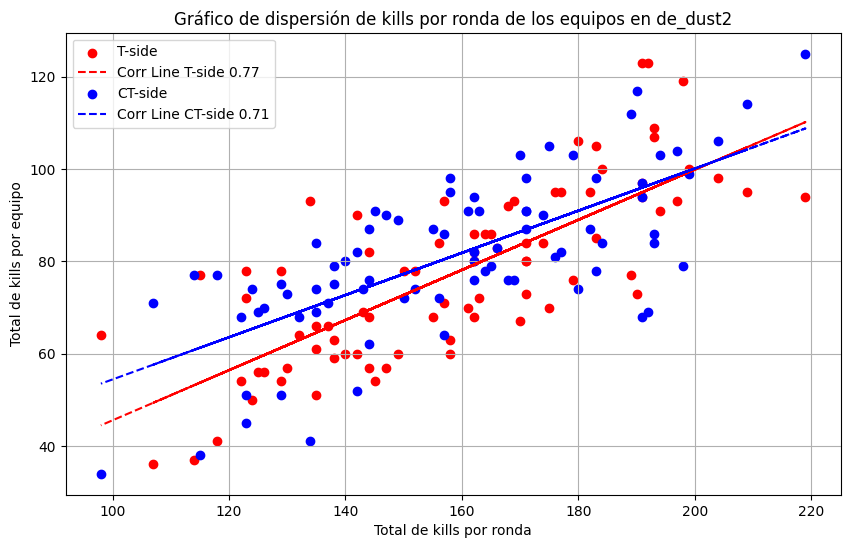

In [10]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar T-side
plt.scatter(dust2K, t_arr, color='red', label='T-side')
plt.plot(dust2K, slope_T*dust2K + intercept_T, color='red', linestyle='--', label=f'Corr Line T-side {corr_T:.2f}')

# Graficar CT-side
plt.scatter(dust2K, ct_arr, color='blue', label='CT-side')
plt.plot(dust2K, slope_CT*dust2K + intercept_CT, color='blue', linestyle='--', label=f'Corr Line CT-side {corr_CT:.2f}')

plt.title('Gráfico de dispersión de kills por ronda de los equipos en de_dust2')
plt.xlabel('Total de kills por ronda')
plt.ylabel('Total de kills por equipo')
plt.legend()
plt.grid(True)
plt.show()

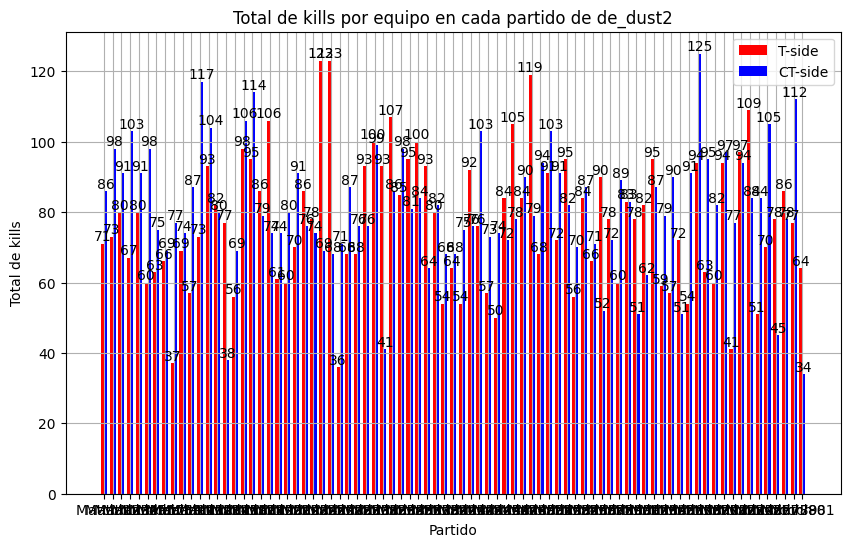

In [11]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(matchs)) + 1

# Graficar T-side
plt.bar(index - bar_width/2, t_arr, bar_width, color='red', label='T-side')
for i in range(len(matchs)):
    plt.text(index[i] - bar_width/2, t_arr[i], str(t_arr[i]), ha='center', va='bottom')

# Graficar CT-side
plt.bar(index + bar_width/2, ct_arr, bar_width, color='blue', label='CT-side')
for i in range(len(matchs)):
    plt.text(index[i] + bar_width/2, ct_arr[i], str(ct_arr[i]), ha='center', va='bottom')

plt.title('Total de kills por equipo en cada partido de de_dust2')
plt.xlabel('Partido')
plt.ylabel('Total de kills')
plt.xticks(index, [f'Match {i+1}' for i in range(len(matchs))])
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()